ANN

The purpose of this chapter is to use the python libraries given by scikit learn to Prepare stock price data for training and testing an ANN model.
Dataset: infy.csv
The dataset contains daily stock price data of infosys Limited listed in NASDAQ , starting from 11-03-1999 to 19-05-2015. The data was downloaded from Yahoo! Finance and contains Date, Opening price (Open), Highest price of the day (High), Lowest price of the day (Low), Closing price (Close), Trading volume (Volume) and Adjusted closing price  (Adj Close) fields.  

Class work:
Prepare data as per guidelines in Kaastra & Boyd (1996) and Borant L. (2004) for ANN training and testing
Design and train an MLP network to learn patterns in the stock price data
Test and evaluate the performance of various models

In [1]:
#IMPORTING LIBRARIES

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import sklearn.neural_network as nn
import matplotlib.pyplot as plt

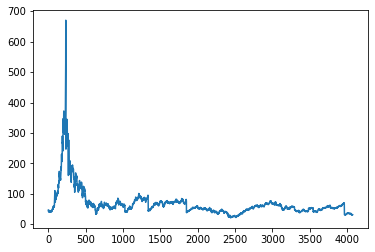

In [2]:
#READING AND EXPLORING DATA
data=pd.read_csv("/Users/sajimathew/Documents/DoMS/Teaching/EMBA/DMBI/DMBI-2020/Data/infy.csv")
price=data['Close']
Nandata=np.count_nonzero(pd.isnull(price))
Nandata
#plt.plot(price)
#reversing the data series
price=np.flipud(price)
plt.plot(price)
#price.describe()

In [3]:
#DEFINING SMA FUNCTION to compute moving averages of a given series and period; calculating MOVING AVERAGESs for 5,10 and 50 trading days

def SMA(series,period):   
    i = 0
    MA = []
    while i < len(series) - period + 1:
        this_window = series[i : i + period]
        window_average = sum(this_window) / period
        MA.append(window_average)
        i += 1
    return MA;

MA5=SMA(price,5)
MA10=SMA(price,10)
MA50=SMA(price,50)

In [4]:
#COMPUTING MOMENTUM for 5 days
j = 4
Mo = []
while j < len(price) - 1:
    window_momentum = (price[j]- price[j-4])/ 5
    Mo.append(window_momentum)
    j += 1


In [5]:
#COMPUTING RELATIVE STRENGTH INDICATOR (RSI) for 9 days
#Set minimum value of changes set to one to avoid division by zero
k = 0
RSI = []
while k < len(price) - 10:
    this_window = price[k:k+9]
    l=0
    ch_pos=0
    ch_neg=0
    for l in range(8):
        window_change = price[k+l+1]-price[k+l]
        if window_change>1:
            ch_pos+=1
        else:
            ch_neg+=1
    RSI_window=100-100/(1+ch_pos/ch_neg)
    RSI.append(RSI_window)
    k += 1


In [8]:
#DATA SYNCHRONIZATION (all data aligned with respect to end point)

mprice=price[50:len(price)-2]
mlag_1=price[49:len(price)-3]
mlag_2=price[48: len(price)-4]
#All SMAs will begin from 50th point
mMA5=MA5[50-(len(price)-len(MA5)):len(MA5)-2]
mMA10=MA10[50-(len(price)-len(MA10)):len(MA10)-2]
mMA50=MA50[50-(len(price)-len(MA50)):len(MA50)-2]
mMo=Mo[50-(len(price)-len(Mo)):len(Mo)-2]
mRSI=RSI[50-(len(price)-len(RSI)):len(RSI)-2]
mTg=price[51:len(price)-1].T
mdata=np.array([mprice,mlag_1,mlag_2,mMA5,mMA10,mMA50,mMo,mRSI])

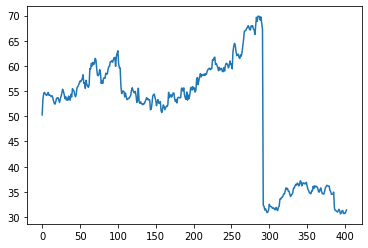

In [9]:
#DATA split for training and testing

from sklearn.model_selection import train_test_split
#scaler = StandardScaler()
#scaler.fit(mdata)
#X=scaler.transform(mdata)
#Scaling deterioarates model performance, hence not done
m=mdata.T
X_train, X_test, y_train, y_test = train_test_split(m,mTg,test_size=0.1,shuffle=False)
#shuffle=true will shuffle the data
plt.plot(y_test)


In [19]:
#MODEL BUILDING: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor
# https://scikit-learn.org/stable/modules/neural_networks_supervised.html
#The rectified linear activation function or ReLU is a non-linear function or piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. 
#max(0,x).Useful for gradient optimisers; activation function for hidden layers

nn8431=nn.MLPRegressor(hidden_layer_sizes=(3,2), 
                    activation='relu', 
                    learning_rate='constant', learning_rate_init=0.1, 
                    max_iter=5000,
                    tol=0.0001, momentum=0.8)
nn8431.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(3, 2), learning_rate_init=0.1, max_iter=5000,
             momentum=0.8)

In [20]:
#MODEL TESTING
y_pred=nn8431.predict(X_test)
loss8431=nn8431.loss_
loss8431

38.725167984205186

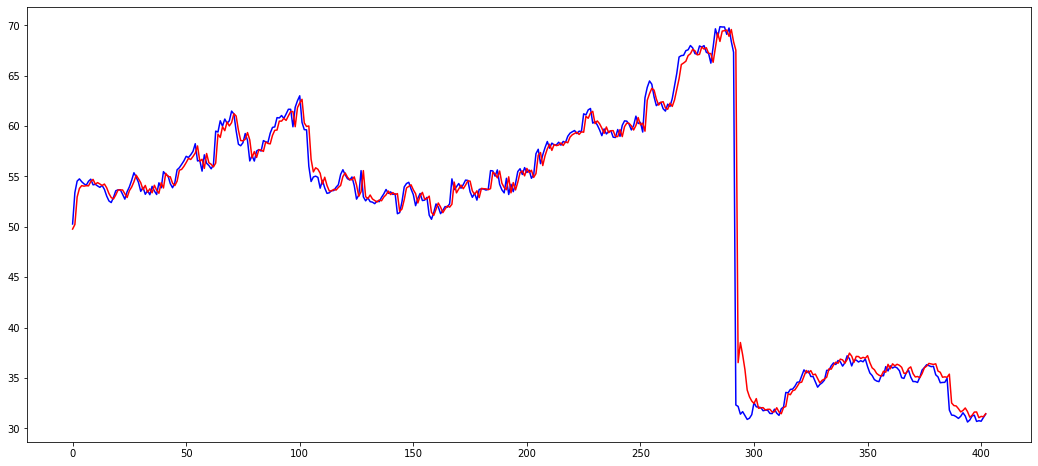

In [21]:
plt.figure(figsize=[18, 8])
plt.plot(y_test,color='b')
plt.plot(y_pred,color='r')